# <font color= Blue ><center>Home Price Index</center></color>

### Problem Statement : 
Find publicly available data for key supply-demand factors that influence US home prices 
nationally. Then, build a data science model that explains how these factors impacted home prices over the last 20 yea

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
df=pd.read_excel('HPI_Dataset.xlsx')

### Sample of the dataset

In [30]:
df.head()

,Date,Unemployment_Rate,GDP,Personal_Tax,Mortgage_rate,Recession,Construction_Spending,No_of_PERMIT,Population,Life_Expectancy,CPI,HPI
0,2000-01-01,4.033333,10002.179,681.0,8.256923,0.0,796045.333333,1690.000000,281304.333333,76.636585,167.166667,101.339000
1,2000-04-01,3.933333,10247.720,681.0,8.316154,0.0,801727.333333,1570.666667,282002.000000,76.636585,168.466667,103.675000
2,2000-07-01,4.000000,10318.165,681.0,8.020000,0.0,801155.333333,1554.666667,282768.666667,76.636585,170.400000,105.786667
3,2000-10-01,3.900000,10435.744,681.0,7.620769,0.0,815890.000000,1578.000000,283518.666667,76.636585,172.266667,108.274667
4,2001-01-01,4.233333,10470.231,696.0,7.006923,1.0,818727.666667,1671.333333,284168.666667,76.836585,174.900000,110.485333


In [31]:
df.shape

(94, 12)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   94 non-null     datetime64[ns]
 1   Unemployment_Rate      94 non-null     float64       
 2   GDP                    94 non-null     float64       
 3   Personal_Tax           92 non-null     float64       
 4   Mortgage_rate          94 non-null     float64       
 5   Recession              93 non-null     float64       
 6   Construction_Spending  94 non-null     float64       
 7   No_of_PERMIT           94 non-null     float64       
 8   Population             94 non-null     float64       
 9   Life_Expectancy        88 non-null     float64       
 10  CPI                    94 non-null     float64       
 11  HPI                    94 non-null     float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 8.9 KB


### Datatype for each variable

In [33]:
pd.DataFrame(df.dtypes,columns=["Datatype"])

,Datatype
Date,datetime64[ns]
Unemployment_Rate,float64
GDP,float64
Personal_Tax,float64
Mortgage_rate,float64
Recession,float64
Construction_Spending,float64
No_of_PERMIT,float64
Population,float64
Life_Expectancy,float64


### Missing values in the dataset

In [34]:
pd.DataFrame(df.isnull().sum(),columns=["No.of.null values"])

,No.of.null values
Date,0
Unemployment_Rate,0
GDP,0
Personal_Tax,2
Mortgage_rate,0
Recession,1
Construction_Spending,0
No_of_PERMIT,0
Population,0
Life_Expectancy,6


In [35]:
df.duplicated().sum()

0

* There are total 94 rows and 12 columns in the dataset.  
* Except Date all other column are numerical variable. 
* From the above results we can see that the variables Personal_Tax,Recession & Life_Expectancy  has some null values, need to treat them.
* Also checked that there is no duplicate rows.  

### Exploratory data analysis

In [36]:
df.describe(include='all')

,Date,Unemployment_Rate,GDP,Personal_Tax,Mortgage_rate,Recession,Construction_Spending,No_of_PERMIT,Population,Life_Expectancy,CPI,HPI
count,94,94.000000,94.000000,92.000000,94.000000,93.000000,9.400000e+01,94.000000,94.000000,88.000000,94.000000,94.000000
unique,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2000-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2000-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.808511,16613.797936,1577.076087,5.041323,0.129032,1.126708e+06,1357.039007,311461.826241,77.933592,226.823546,174.613628
std,NaN,1.961554,4447.182538,1100.030761,1.358677,0.337053,3.037801e+05,458.783662,16504.942142,0.813113,36.823026,48.140798
min,NaN,3.500000,10002.179000,582.000000,2.760714,0.000000,7.624990e+05,538.666667,281304.333333,76.329268,167.166667,101.339000
25%,NaN,4.375000,13392.943000,638.000000,3.903970,0.000000,8.592403e+05,1030.333333,297248.416667,77.036585,199.658333,142.538750


The above table shows the statistical summary of the dataset, that are listed below
* Unemployment_Rate ranges from3.5% to 12.97 % and the average Unemployment_Rate for last 23 year is 5.8%
* The average GDP is around \\$16,613.80B, with values ranging from \\$10,002.18B to \\$27,063.01B.
* The mean personal tax is roughly \\$1,577.08, varying between \\$582.00 and \\$3,423.00.
* The average mortgage rate is about 5.04%, with a minimum of 2.76% and a maximum of 8.32%.
* Among 94 quarters, a recession has not occurred for 81 quarters
* Average construction spending is approximately \\$1,126,708M with significant variability and values ranging from \\$762,499M to \\$1,937,838M
* No. of PERMIT: The mean number of permits is roughly 1,357.04K ranging from 538.67K to 2,228.33K.
* The population ranges from approximately 281,304K to 335,019K. The mean population is approximately 311,461.83K, 
* The life expectancy ranges from approximately 76.33 to 78.84 years. The mean life expectancy is approximately 77.93 years
* The CPI ranges from approximately 167.17 to 318.25. The mean CPI is approximately 226.82, with a standard deviation of about 36.82.
* The HPI ranges from approximately 101.34 to 303.09. The mean HPI is approximately 174.61, with a standard deviation of about 48.14. There is a significant variation in house prices.

### Data Visualization

### Univariate Analysis

In [37]:
dfnum=df.drop(['Date','Recession'],axis=1)

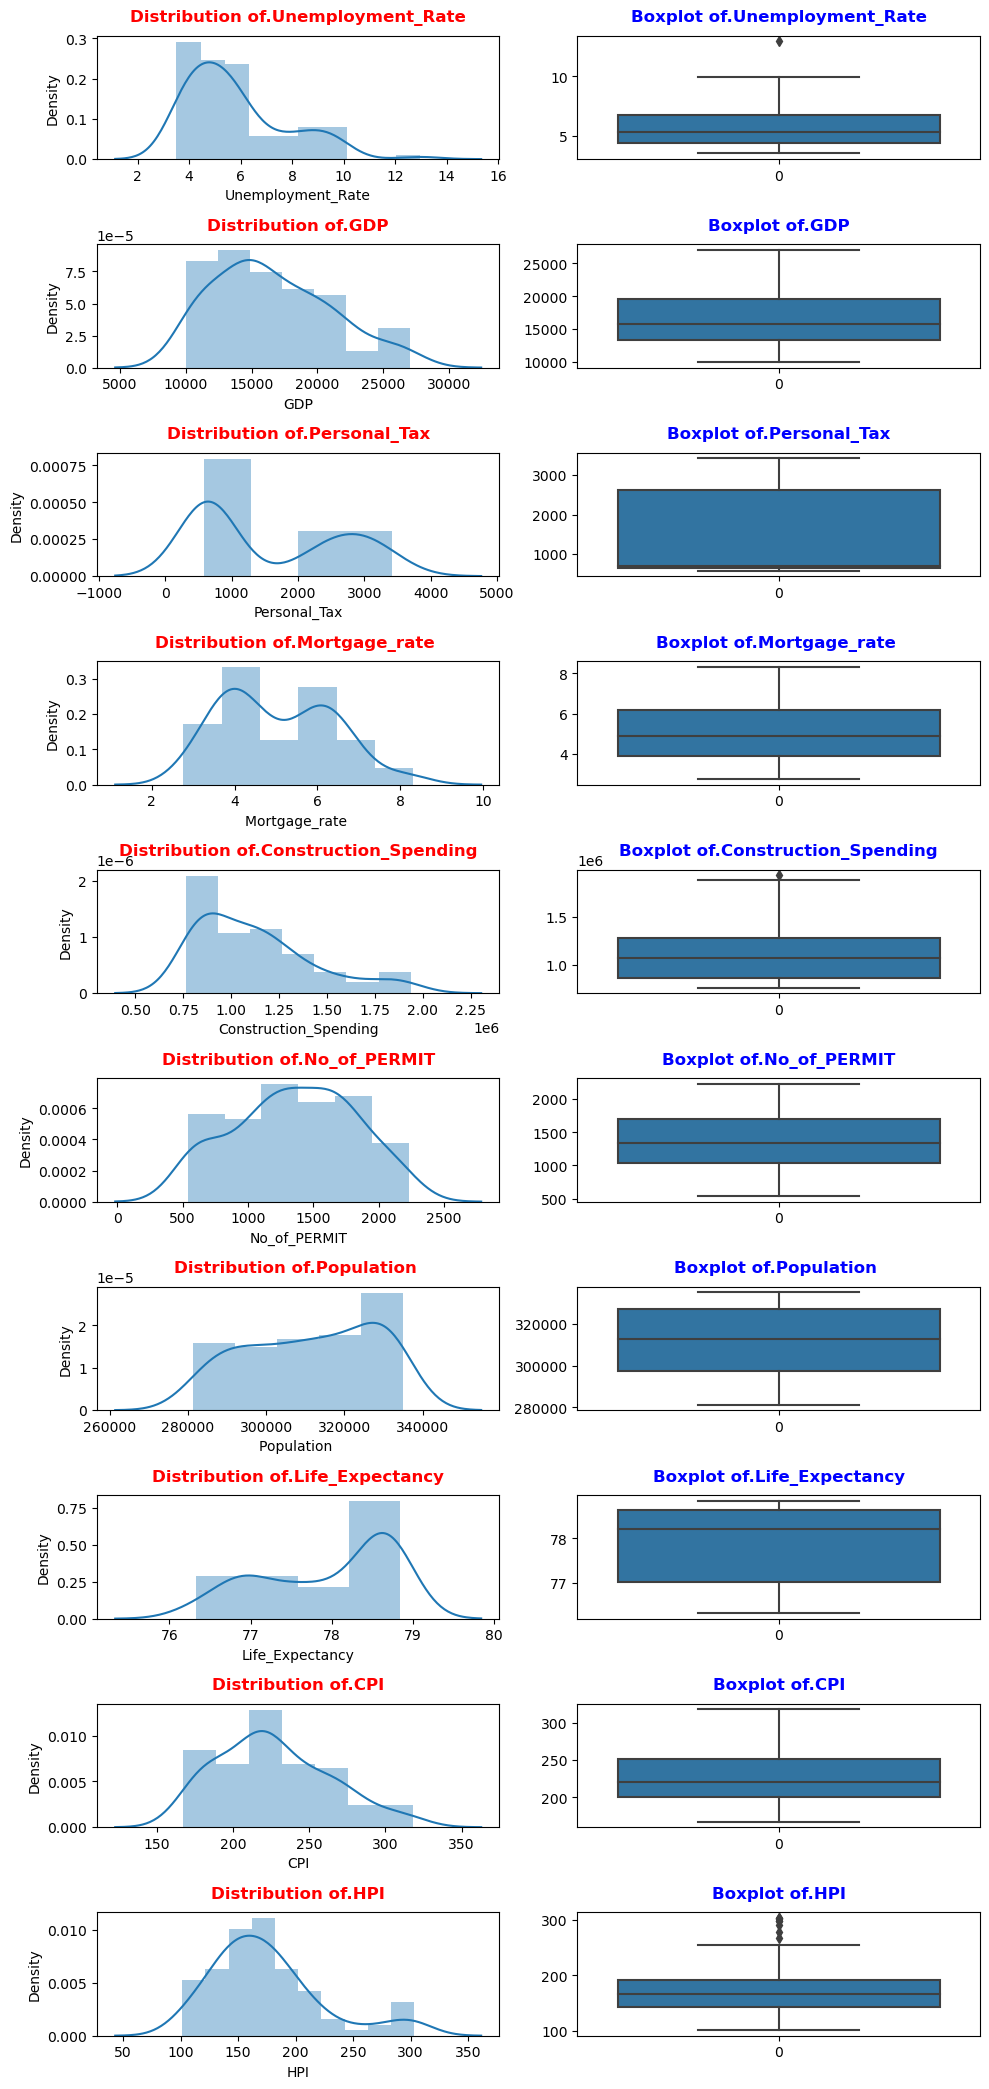

In [38]:
plt.figure(figsize=(10,21))
for i in range(len(dfnum.columns)):
    plt.subplot(10,2,(2*i)+1)
    sns.distplot(dfnum[dfnum.columns[i]])
    plt.title('Distribution of.{}'.format(dfnum.columns[i]),weight='bold',color='red',y=1.05)
    plt.subplot(10,2,(2*i)+2)
    sns.boxplot(dfnum[dfnum.columns[i]])
    plt.title('Boxplot of.{}'.format(dfnum.columns[i]),weight='bold',color='Blue',y=1.05)
    plt.tight_layout()

**From the above graph,we can observe the following informations** 
* The variable Unemployment_Rate is highlyly right skewed
* The variable GDP is moderately right skewed
* The variable Personal_Tax is slightly right skewed
* The variable Mortgage_rate  is slightly right skewed
* The variable Construction_Spending is highlyly right skewed
* The variable No_of_PERMIT is slightly left skewed
* The variable Population  is slightly left skewed
* The variable Life_Expectancy is moderately left skewed
* The variable CPI is slightly right skewed
* The variable HPI  is highlyly right skewed

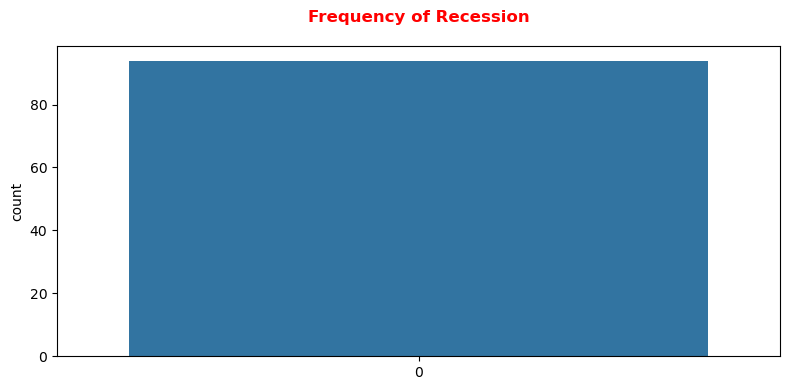

In [39]:
plt.figure(figsize=(8,4))
sns.countplot(df['Recession'])
plt.title('Frequency of Recession',weight='bold',color='red',y=1.05)
plt.tight_layout()

In [40]:
df['Recession'].value_counts()

0.0    81
1.0    12
Name: Recession, dtype: int64

* From the above graph,we can observe that the recession has not occurred for most of the quarters.

**Bivariate Anlysis**

sns.pairplot(df)
plt.show

**The above pair plot shows that our dependent variable HPI has strong corelation with variables GDP,Construction_spending,Personal_Tax and Population. .The value of co-relation has been explained with the aid of heatmap**

**Heatmap**

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,mask=np.triu(np.ones_like(df.corr(),dtype=bool)))
plt.show()

### Data Preparation 

**Test Train Spit**

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
indep_train,indep_test, dep_train, dep_test = train_test_split(df.drop('HPI', 1), df['HPI'],
                                                   test_size=0.2, random_state=5)

In [43]:
indep_train.head()

,Date,Unemployment_Rate,GDP,Personal_Tax,Mortgage_rate,Recession,Construction_Spending,No_of_PERMIT,Population,Life_Expectancy,CPI
43,2010-10-01,9.500000,15309.474,606.0,4.436154,0.0,7.983060e+05,583.333333,310817.333333,78.541463,216.555333
35,2008-10-01,6.866667,14608.209,674.0,5.841429,1.0,1.030044e+06,638.666667,305616.666667,78.039024,217.586333
13,2003-04-01,6.133333,11312.766,611.0,5.506923,0.0,8.690460e+05,1837.666667,290252.666667,77.036585,184.400000
55,2013-10-01,6.933333,17192.019,2122.0,4.293077,0.0,9.648490e+05,1026.000000,318072.000000,78.741463,229.108667
66,2016-07-01,4.900000,18892.639,2631.0,3.446154,0.0,1.222740e+06,1234.000000,324925.333333,78.539024,244.963333


In [44]:
indep_test.head()

,Date,Unemployment_Rate,GDP,Personal_Tax,Mortgage_rate,Recession,Construction_Spending,No_of_PERMIT,Population,Life_Expectancy,CPI
40,2010-01-01,9.833333,14764.610,606.0,4.995833,0.0,8.196160e+05,657.666667,308901.666667,78.541463,216.131333
37,2009-04-01,9.300000,14381.236,657.0,5.012308,1.0,9.216773e+05,559.333333,306866.000000,78.390244,217.083000
52,2013-01-01,7.733333,16648.189,2122.0,3.496923,0.0,8.669383e+05,952.000000,316195.333333,78.741463,225.485000
74,2018-07-01,3.766667,20798.730,2925.0,4.566923,0.0,1.334397e+06,1315.333333,329039.666667,78.639024,259.188667
54,2013-07-01,7.233333,16953.838,2122.0,4.440000,0.0,9.283127e+05,988.333333,317396.000000,78.741463,227.948000


In [45]:
dep_train.head()

43    142.254667
35    156.029333
13    131.755667
55    160.103667
66    181.836000
Name: HPI, dtype: float64

In [46]:
dep_test.head()

40    146.295333
37    147.911000
52    148.191667
74    203.658000
54    156.932000
Name: HPI, dtype: float64

**Impute null values**

I used a KNN imputer to address missing values resulting from data unavailability.

In [47]:
from sklearn.impute import KNNImputer

In [48]:

knn = KNNImputer(n_neighbors=5)

In [49]:
knn.fit(indep_train.drop('Date',1))

KNNImputer()

In [50]:
t=indep_train.drop('Date',1).columns

In [51]:
indep_tr = pd.DataFrame(knn.transform(indep_train.drop('Date',1)),columns=t)

In [52]:
df= pd.merge(indep_tr,indep_train[['Date','GDP']],on='GDP')

In [54]:
df.head()

,Unemployment_Rate,GDP,Personal_Tax,Mortgage_rate,Recession,Construction_Spending,No_of_PERMIT,Population,Life_Expectancy,CPI,Date
0,9.500000,15309.474,606.0,4.436154,0.0,7.983060e+05,583.333333,310817.333333,78.541463,216.555333,2010-10-01
1,6.866667,14608.209,674.0,5.841429,1.0,1.030044e+06,638.666667,305616.666667,78.039024,217.586333,2008-10-01
2,6.133333,11312.766,611.0,5.506923,0.0,8.690460e+05,1837.666667,290252.666667,77.036585,184.400000,2003-04-01
3,6.933333,17192.019,2122.0,4.293077,0.0,9.648490e+05,1026.000000,318072.000000,78.741463,229.108667,2013-10-01
4,4.900000,18892.639,2631.0,3.446154,0.0,1.222740e+06,1234.000000,324925.333333,78.539024,244.963333,2016-07-01


In [56]:
indep_train=df

In [57]:
indep_train.head()

,Unemployment_Rate,GDP,Personal_Tax,Mortgage_rate,Recession,Construction_Spending,No_of_PERMIT,Population,Life_Expectancy,CPI,Date
0,9.500000,15309.474,606.0,4.436154,0.0,7.983060e+05,583.333333,310817.333333,78.541463,216.555333,2010-10-01
1,6.866667,14608.209,674.0,5.841429,1.0,1.030044e+06,638.666667,305616.666667,78.039024,217.586333,2008-10-01
2,6.133333,11312.766,611.0,5.506923,0.0,8.690460e+05,1837.666667,290252.666667,77.036585,184.400000,2003-04-01
3,6.933333,17192.019,2122.0,4.293077,0.0,9.648490e+05,1026.000000,318072.000000,78.741463,229.108667,2013-10-01
4,4.900000,18892.639,2631.0,3.446154,0.0,1.222740e+06,1234.000000,324925.333333,78.539024,244.963333,2016-07-01


In [58]:
indep_train.isnull().sum()

Unemployment_Rate        0
GDP                      0
Personal_Tax             0
Mortgage_rate            0
Recession                0
Construction_Spending    0
No_of_PERMIT             0
Population               0
Life_Expectancy          0
CPI                      0
Date                     0
dtype: int64

In [59]:
t1=indep_test.drop('Date',1).columns

In [60]:
indep_ts = pd.DataFrame(knn.transform(indep_test.drop('Date',1)),columns=t1)

In [61]:
df1= pd.merge(indep_ts,indep_test[['Date','GDP']],on='GDP')

In [63]:
indep_test=df1

In [64]:
indep_test.head()

,Unemployment_Rate,GDP,Personal_Tax,Mortgage_rate,Recession,Construction_Spending,No_of_PERMIT,Population,Life_Expectancy,CPI,Date
0,9.833333,14764.610,606.0,4.995833,0.0,8.196160e+05,657.666667,308901.666667,78.541463,216.131333,2010-01-01
1,9.300000,14381.236,657.0,5.012308,1.0,9.216773e+05,559.333333,306866.000000,78.390244,217.083000,2009-04-01
2,7.733333,16648.189,2122.0,3.496923,0.0,8.669383e+05,952.000000,316195.333333,78.741463,225.485000,2013-01-01
3,3.766667,20798.730,2925.0,4.566923,0.0,1.334397e+06,1315.333333,329039.666667,78.639024,259.188667,2018-07-01
4,7.233333,16953.838,2122.0,4.440000,0.0,9.283127e+05,988.333333,317396.000000,78.741463,227.948000,2013-07-01


In [65]:
indep_test.shape

(19, 11)

In [66]:
indep_test.isnull().sum()

Unemployment_Rate        0
GDP                      0
Personal_Tax             0
Mortgage_rate            0
Recession                0
Construction_Spending    0
No_of_PERMIT             0
Population               0
Life_Expectancy          0
CPI                      0
Date                     0
dtype: int64

**We imputed missing values using the KNN imputer separately for both the test and train data to prevent data leakage**

**Scaling**  

Scaling nescesscary for distance based algorithm like KNN,Clusteringmuch. Also we need to scale the data for algorithm like Linear regression,Logistc Regression & ANN which uses gradient descent. Since scaling helps gradient descent to converge and reach a global minima quickly.  


As I am planning to use the linear regression algorithm, I have performed scaling using the standard scaler for both the test and train data. I aim to preserve the original scale of the target variable since it represents the actual values we are trying to predict.


In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [69]:
indep_tr = indep_train.drop('Date',1)
indep_ts = indep_test.drop('Date',1)

In [73]:
sc_indep_tr = sc.fit_transform(indep_tr)
sc_indep_tr=pd.DataFrame(sc_indep_tr,columns=indep_tr.columns)

In [74]:
sc_indep_tr.head()

,Unemployment_Rate,GDP,Personal_Tax,Mortgage_rate,Recession,Construction_Spending,No_of_PERMIT,Population,Life_Expectancy,CPI
0,1.886125,-0.355516,-0.992811,-0.390081,-0.369274,-1.099278,-1.794597,-0.106098,0.815192,-0.338076
1,0.564075,-0.508258,-0.932518,0.596855,2.708013,-0.359956,-1.663988,-0.411767,0.255750,-0.311085
2,0.195909,-1.226036,-0.988377,0.361929,-0.369274,-0.873593,1.166133,-1.314786,-0.860418,-1.179870
3,0.597544,0.054520,0.351366,-0.490565,-0.369274,-0.567949,-0.749726,0.320294,1.037882,-0.009442
4,-0.423279,0.424931,0.802675,-1.085366,-0.369274,0.254811,-0.258763,0.723099,0.812476,0.405617


In [75]:
sc_indep_ts = sc.fit_transform(indep_ts)
sc_indep_ts=pd.DataFrame(sc_indep_ts,columns=indep_ts.columns)
sc_indep_ts.head()

,Unemployment_Rate,GDP,Personal_Tax,Mortgage_rate,Recession,Construction_Spending,No_of_PERMIT,Population,Life_Expectancy,CPI
0,2.143208,-0.163608,-0.618431,-0.243752,-0.433013,-1.003550,-1.333572,0.157653,0.851977,-0.009122
1,1.839745,-0.276661,-0.562768,-0.227147,2.309401,-0.582561,-1.507880,-0.001110,0.630943,0.025850
2,0.948322,0.391843,1.036155,-1.754498,-0.433013,-0.808352,-0.811830,0.726490,1.144313,0.334608
3,-1.308684,1.615801,1.912562,-0.676049,-0.433013,1.119854,-0.167777,1.728226,0.994580,1.573158
4,0.663825,0.481976,1.036155,-0.803974,-0.433013,-0.555191,-0.747425,0.820130,1.144313,0.425119


### Linear Regression 

In [77]:
from sklearn.linear_model import LinearRegression

In [79]:
rm = LinearRegression()
rm.fit(sc_indep_tr,dep_train)

LinearRegression()

**The coefficients for each of the independent variables and the intercept for the model are given below**

In [85]:
for idx, col_name in enumerate(sc_indep_tr.columns):
    print("The coefficient for {} is {}".format(col_name, rm.coef_[idx]))

The coefficient for Unemployment_Rate is 9.0800216146177
The coefficient for GDP is 73.34170348473016
The coefficient for Personal_Tax is -9.174634558206794
The coefficient for Mortgage_rate  is 0.6802390331190274
The coefficient for Recession is -0.4022843363831916
The coefficient for Construction_Spending is 45.55199959645697
The coefficient for No_of_PERMIT is 2.1107360320655455
The coefficient for Population  is -24.86677889977926
The coefficient for Life_Expectancy is 7.97436821216523
The coefficient for CPI is -33.53366744634221


In [83]:
rm.coef_

array([  9.08002161,  73.34170348,  -9.17463456,   0.68023903,
        -0.40228434,  45.5519996 ,   2.11073603, -24.8667789 ,
         7.97436821, -33.53366745])

In [87]:
intercept = rm.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 176.36363111111095


**R^2 (co-efficient of Determinant) for train and test data are given below**

In [91]:
score_tr=rm.score(sc_indep_tr,dep_train)
score_ts=rm.score(sc_indep_ts,dep_test)

In [92]:
print('R-Sqare for training data is',score_tr)
print('R-Sqare for testing data is',score_ts)

R-Sqare for training data is 0.98996313874578
R-Sqare for testing data is 0.8403053752090128


**RMSE for train and test data are given below**

In [93]:
from sklearn import metrics

In [94]:
pred_tr=rm.predict(sc_indep_tr)
pred_ts=rm.predict(sc_indep_ts)

In [96]:
rmse_tr=np.sqrt(metrics.mean_squared_error(dep_train,pred_tr))
rmse_ts=np.sqrt(metrics.mean_squared_error(dep_test,pred_ts))

In [97]:
print('RMSE for training data is',rmse_tr)
print('RMSE for testing data is',rmse_ts)

RMSE for training data is 5.0073935517414325
RMSE for testing data is 15.072782901099743


**The Linear equation for model is given below**

In [102]:
for idx, col_name in enumerate(sc_indep_tr.columns):
    print("{} * {} + ".format(col_name, rm.coef_[idx]),end=' ')


Unemployment_Rate * 9.0800216146177 +  GDP * 73.34170348473016 +  Personal_Tax * -9.174634558206794 +  Mortgage_rate  * 0.6802390331190274 +  Recession * -0.4022843363831916 +  Construction_Spending * 45.55199959645697 +  No_of_PERMIT * 2.1107360320655455 +  Population  * -24.86677889977926 +  Life_Expectancy * 7.97436821216523 +  CPI * -33.53366744634221 +  

**The following are best 5 params which influencing price.** 
* one unit increase in Unemployment_Rate  increase the HPI by 9.0 units,keeping all other attributes constant.
* one unit increase in GDP increase the HPI by 73.34 units,keeping all other attributes constant.
* one unit increase in Construction_Spending increase the HPI by 45.55 units,keeping all other attributes constant.
* one unit increase in Personal_Tax decrease the HPI by 9.17 units ,keeping all other attributes constant.
* one unit increase in CPI decrease the HPI by 33.53 units ,keeping all other attributes constant. 

### Time Series Forecasting

**Letz Forecast HPI for upcoming quarters for next 2 year using ARIMA model.Most of our data not captured seasonality, so we didnt include seasonality in our forecasting**

To perform a forecasting i have considered only date and HPI column.

In [105]:
df1=pd.read_excel('HPI_Dataset.xlsx')

In [107]:
df = df1[['Date','HPI']]

In [108]:
df.head()

,Date,HPI
0,2000-01-01,101.339000
1,2000-04-01,103.675000
2,2000-07-01,105.786667
3,2000-10-01,108.274667
4,2001-01-01,110.485333


In [110]:
df.tail()

,Date,HPI
89,2022-04-01,303.088000
90,2022-07-01,301.625667
91,2022-10-01,298.269333
92,2023-01-01,297.530333
93,2023-04-01,302.544667


In [124]:
df = df.set_index('Date')

In [125]:
df_tr   =   df[0:79] 
df_ts    =   df[80:]

In [126]:
df_tr.head()

,HPI
Date,
2000-01-01,101.339000
2000-04-01,103.675000
2000-07-01,105.786667
2000-10-01,108.274667
2001-01-01,110.485333


In [127]:
df_ts.head()

,HPI
Date,
2020-01-01,215.681333
2020-04-01,217.156000
2020-07-01,222.562000
2020-10-01,233.195000
2021-01-01,242.343667


**we are using Dicky Fuller test to check the stationarity of the time series**

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.`  

We would want the series to be stationary for building SARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ = 0.05

We are checking stationarity for the Train Data only because, we are building any models on the Train Data only.We are evaluating our models on Test data, so no
need to check stationarity for test data.

In [128]:
from statsmodels.tsa.stattools import adfuller

In [129]:
dftest = adfuller(df_tr,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -3.493
DF test p-value is 0.04018991037502983
Number of lags used 3


Our Time Series is stationary,Since p_value is lesser  than $\alpha$. Below plots shows the stationary series of train data.

In [139]:
from pylab import rcParams
rcParams['figure.figsize']=15,6

Text(0.5, 1.05, 'Stationary series of train data')

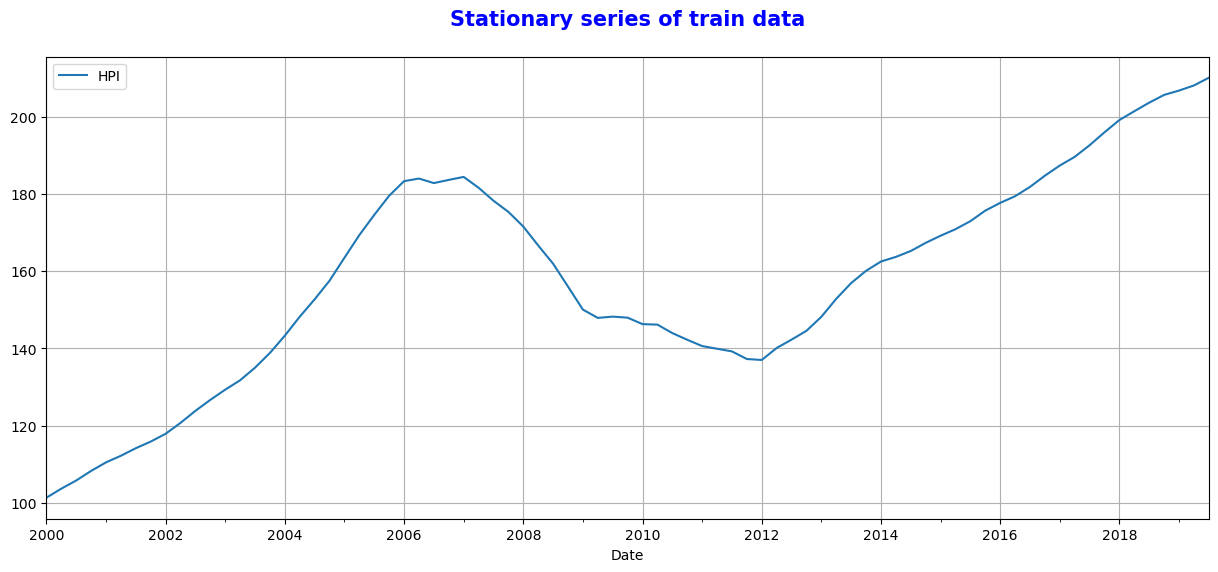

In [140]:
df_tr.dropna().plot(grid=True);
plt.title('Stationary series of train data',fontsize=15,y=1.05,color='b',weight='bold')

#### Parameters selection using the lowest Akaike Information Criteria (AIC)
* Taking p & q = (0,1,2,3)
* d=0, as we didnt take any differnce to make stationarity.

In [162]:
import itertools
p = q = range(0, 4)
d= range(0,1)
pdq = tuple(list(itertools.product(p, d, q)))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 0, 0)
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (0, 0, 3)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (1, 0, 3)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)
Model: (2, 0, 3)
Model: (3, 0, 0)
Model: (3, 0, 1)
Model: (3, 0, 2)
Model: (3, 0, 3)


In [163]:
pdq

((0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3))

In [164]:
from statsmodels.tsa.arima.model import ARIMA

In [165]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [166]:
type(pdq)

tuple

In [167]:
for pdq in pdq:
    ARIMA_model=ARIMA(df_tr['HPI'],order=pdq).fit()
    print('ARIMA{} - AIC:{}'.format(pdq,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':pdq, 'AIC': ARIMA_model.aic}, ignore_index=True)

C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-

ARIMA(0, 0, 0) - AIC:752.2381154610341
ARIMA(0, 0, 1) - AIC:653.4062674726989
ARIMA(0, 0, 2) - AIC:562.0805064439219


C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferre

ARIMA(0, 0, 3) - AIC:488.206007598343
ARIMA(1, 0, 0) - AIC:409.8309632116177
ARIMA(1, 0, 1) - AIC:330.95241333434126
ARIMA(1, 0, 2) - AIC:289.02653816663985
ARIMA(1, 0, 3) - AIC:280.29984806588845
ARIMA(2, 0, 0) - AIC:256.448744287282


C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-

ARIMA(2, 0, 1) - AIC:251.9691351391336


C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferre

ARIMA(2, 0, 2) - AIC:249.74299990039705
ARIMA(2, 0, 3) - AIC:251.44077884554596
ARIMA(3, 0, 0) - AIC:256.4773686353677


C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-

ARIMA(3, 0, 1) - AIC:251.88674651229002


C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


ARIMA(3, 0, 2) - AIC:251.6929257681373


C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


ARIMA(3, 0, 3) - AIC:251.57756895221172


C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


The Below table shows the first 5 lowest AIC values and their parameters

In [168]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
10,"(2, 0, 2)",249.743000
11,"(2, 0, 3)",251.440779
15,"(3, 0, 3)",251.577569
14,"(3, 0, 2)",251.692926
13,"(3, 0, 1)",251.886747


**The best parameter based on AIC is (2,0,2) and ARIMA_auto model will be built based on these parametres**

**ARIMA_auto model using best parameter**

In [177]:
ARIMA_auto = ARIMA(df_tr, order=(2,0,2))

results_ARIMA_auto  = ARIMA_auto.fit()

print(results_ARIMA_auto.summary())

C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    HPI   No. Observations:                   79
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -118.871
Date:                Sun, 01 Oct 2023   AIC                            249.743
Time:                        16:25:50   BIC                            263.960
Sample:                    01-01-2000   HQIC                           255.439
                         - 07-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        156.9336     15.550     10.092      0.000     126.457     187.410
ar.L1          1.9382      0.047     41.495      0.000       1.847       2.030
ar.L2         -0.9449      0.048    -19.498      0.0

C:\Users\karth\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In summary we can see that, lag one & two of AR and lag one,two  & three of MA are significant, since p_alue is lesser than 0.05

###  Test Prediction by ARIMA

The below plot shows the prediction of test data by ARIMA

In [180]:
ARIMA_pred = results_ARIMA_auto.forecast(steps=len(df_ts))

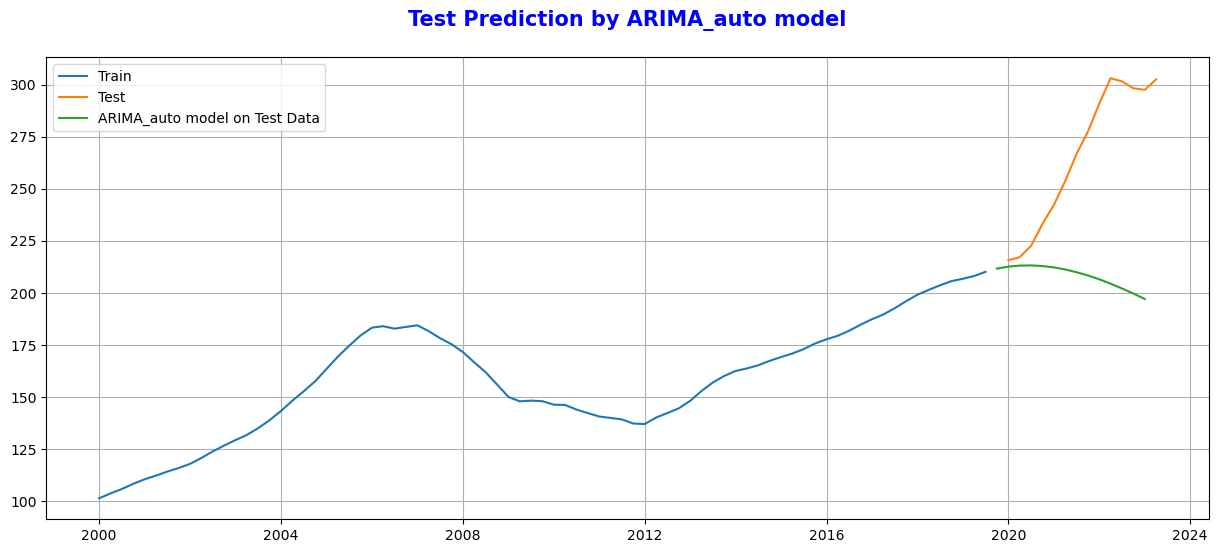

In [181]:
plt.plot(df_tr,label="Train")
plt.plot(df_ts,label="Test")
plt.plot(ARIMA_pred, label='ARIMA_auto model on Test Data')
plt.title('Test Prediction by ARIMA_auto model',fontsize=15,y=1.05,color='b',weight='bold')
plt.legend(loc='best')
plt.grid();

In [182]:
ARIMA_RMSE= metrics.mean_squared_error(df_ts,ARIMA_pred,squared=False)
ARIMA_RMSE

68.81444521008481

**The RMSE value on test data for ARIMA model is 68.81**